<a href="https://colab.research.google.com/github/anujdutt9/Talks_and_Presentations/blob/main/Decoding_the_Giants/Demo_0_Transformer_Self_Attention_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install sentence-transformers -q

In [2]:
from sentence_transformers import SentenceTransformer
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [4]:
# Initialize a pre-trained SentenceTransformer model for word embeddings
model = SentenceTransformer('all-MiniLM-L6-v2')
model.to(device)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


SentenceTransformer(
  (0): Transformer({'max_seq_length': 256, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 384, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
  (2): Normalize()
)

In [5]:
# Example input sentence
sentence = "I saw a dog by the bank of the river"

# Tokenize the sentence and get word embeddings
words = sentence.split()
word_embeddings = model.encode(words, convert_to_tensor=True)  # shape: (num_words, embedding_dim)

print(f"word_embeddings.shape: {word_embeddings.shape}")
print(f"word_embeddings: {word_embeddings}")

word_embeddings.shape: torch.Size([10, 384])
word_embeddings: tensor([[-0.0741,  0.0093,  0.0327,  ...,  0.0267,  0.0189, -0.0824],
        [-0.1212, -0.0246, -0.0002,  ..., -0.0947, -0.0592,  0.0667],
        [-0.0364,  0.0347, -0.0460,  ...,  0.0464, -0.0048,  0.0943],
        ...,
        [-0.0489,  0.0170,  0.0193,  ...,  0.0274,  0.0263,  0.0571],
        [-0.0475,  0.0742, -0.0469,  ...,  0.0842,  0.0724,  0.0996],
        [ 0.0239,  0.0727, -0.0237,  ..., -0.0010,  0.0231,  0.0024]])


In [6]:
# Reshape to add batch dimension (batch_size=1, sequence_length=num_words, embedding_dim)
input_tensor = word_embeddings.unsqueeze(0)
# Print the input, attention weights, and the output
print("Input Tensor (Embeddings for 'I saw a dog by the bank of the river'):\n", input_tensor)

# Define dimensions
embedding_dim = input_tensor.size(-1)
d_k = embedding_dim

Input Tensor (Embeddings for 'I saw a dog by the bank of the river'):
 tensor([[[-0.0741,  0.0093,  0.0327,  ...,  0.0267,  0.0189, -0.0824],
         [-0.1212, -0.0246, -0.0002,  ..., -0.0947, -0.0592,  0.0667],
         [-0.0364,  0.0347, -0.0460,  ...,  0.0464, -0.0048,  0.0943],
         ...,
         [-0.0489,  0.0170,  0.0193,  ...,  0.0274,  0.0263,  0.0571],
         [-0.0475,  0.0742, -0.0469,  ...,  0.0842,  0.0724,  0.0996],
         [ 0.0239,  0.0727, -0.0237,  ..., -0.0010,  0.0231,  0.0024]]])


In [7]:
# Initialize query, key, and value weight matrices
W_q = torch.rand((embedding_dim, d_k))
W_k = torch.rand((embedding_dim, d_k))
W_v = torch.rand((embedding_dim, d_k))

# Compute Q, K, and V matrices
Q = torch.matmul(input_tensor, W_q)  # (batch_size=1, sequence_length=num_words, d_k)
K = torch.matmul(input_tensor, W_k)  # (batch_size=1, sequence_length=num_words, d_k)
V = torch.matmul(input_tensor, W_v)  # (batch_size=1, sequence_length=num_words, d_k)

In [8]:
# Compute attention scores (scaled dot-product)
attention_scores = torch.matmul(Q, K.transpose(-2, -1)) / torch.sqrt(torch.tensor(d_k, dtype=torch.float32))
print("\nAttention Scores:\n", attention_scores)


Attention Scores:
 tensor([[[ 0.7555,  1.3521, -0.1083,  0.2688,  1.3057,  0.1919,  0.6517,
           1.0549,  0.1919,  1.1053],
         [ 0.9983,  1.6506, -0.1525,  0.5142,  1.7494,  0.2763,  0.7573,
           1.2714,  0.2763,  1.6209],
         [ 0.0091,  0.2161, -0.1361, -0.0857,  0.1562, -0.1059,  0.1253,
           0.1996, -0.1059,  0.1300],
         [ 0.5018,  0.9131, -0.1643,  0.1796,  0.8637,  0.0713,  0.3084,
           0.7418,  0.0713,  0.8908],
         [ 1.3932,  2.0571,  0.0342,  0.6108,  2.1850,  0.4630,  0.9149,
           1.6422,  0.4630,  1.9040],
         [ 0.3993,  0.7650, -0.1007,  0.1517,  0.6551,  0.0803,  0.4125,
           0.5534,  0.0803,  0.6473],
         [ 0.5720,  0.9566, -0.0339,  0.2962,  1.0059,  0.2285,  0.4319,
           0.8717,  0.2285,  1.0371],
         [ 1.1641,  1.6159,  0.0059,  0.4563,  1.6752,  0.4104,  0.7800,
           1.4596,  0.4104,  1.4447],
         [ 0.3993,  0.7650, -0.1007,  0.1517,  0.6551,  0.0803,  0.4125,
           0.5534, 

In [9]:
# Compute attention weights
attention_weights = F.softmax(attention_scores, dim=-1)
# Print the attention weights matrix
print("\nAttention Weights (after softmax):\n", attention_weights)


Attention Weights (after softmax):
 tensor([[[0.0962, 0.1747, 0.0406, 0.0591, 0.1668, 0.0548, 0.0867, 0.1298,
          0.0548, 0.1365],
         [0.0917, 0.1760, 0.0290, 0.0565, 0.1943, 0.0445, 0.0720, 0.1205,
          0.0445, 0.1709],
         [0.0961, 0.1182, 0.0831, 0.0874, 0.1113, 0.0857, 0.1079, 0.1163,
          0.0857, 0.1084],
         [0.0995, 0.1501, 0.0511, 0.0721, 0.1428, 0.0647, 0.0820, 0.1264,
          0.0647, 0.1468],
         [0.0978, 0.1900, 0.0251, 0.0447, 0.2159, 0.0386, 0.0606, 0.1255,
          0.0386, 0.1630],
         [0.0996, 0.1436, 0.0604, 0.0778, 0.1287, 0.0724, 0.1010, 0.1163,
          0.0724, 0.1277],
         [0.0948, 0.1393, 0.0517, 0.0720, 0.1463, 0.0673, 0.0824, 0.1280,
          0.0673, 0.1510],
         [0.1071, 0.1683, 0.0336, 0.0528, 0.1786, 0.0504, 0.0730, 0.1439,
          0.0504, 0.1418],
         [0.0996, 0.1436, 0.0604, 0.0778, 0.1287, 0.0724, 0.1010, 0.1163,
          0.0724, 0.1277],
         [0.0912, 0.1592, 0.0327, 0.0571, 0.1878, 0.04

In [10]:
# Compute the output as the weighted sum of values
output = torch.matmul(attention_weights, V)
print("\nOutput:\n", output)


Output:
 tensor([[[ 0.3307,  0.3633, -0.1051,  ..., -0.0480,  0.3449,  0.3333],
         [ 0.3452,  0.3621, -0.0593,  ..., -0.0462,  0.3517,  0.3436],
         [ 0.2921,  0.3508, -0.1980,  ..., -0.0467,  0.3448,  0.3548],
         ...,
         [ 0.3458,  0.3786, -0.0906,  ..., -0.0446,  0.3363,  0.3341],
         [ 0.3062,  0.3474, -0.1560,  ..., -0.0529,  0.3462,  0.3481],
         [ 0.3442,  0.3709, -0.0719,  ..., -0.0439,  0.3420,  0.3467]]])


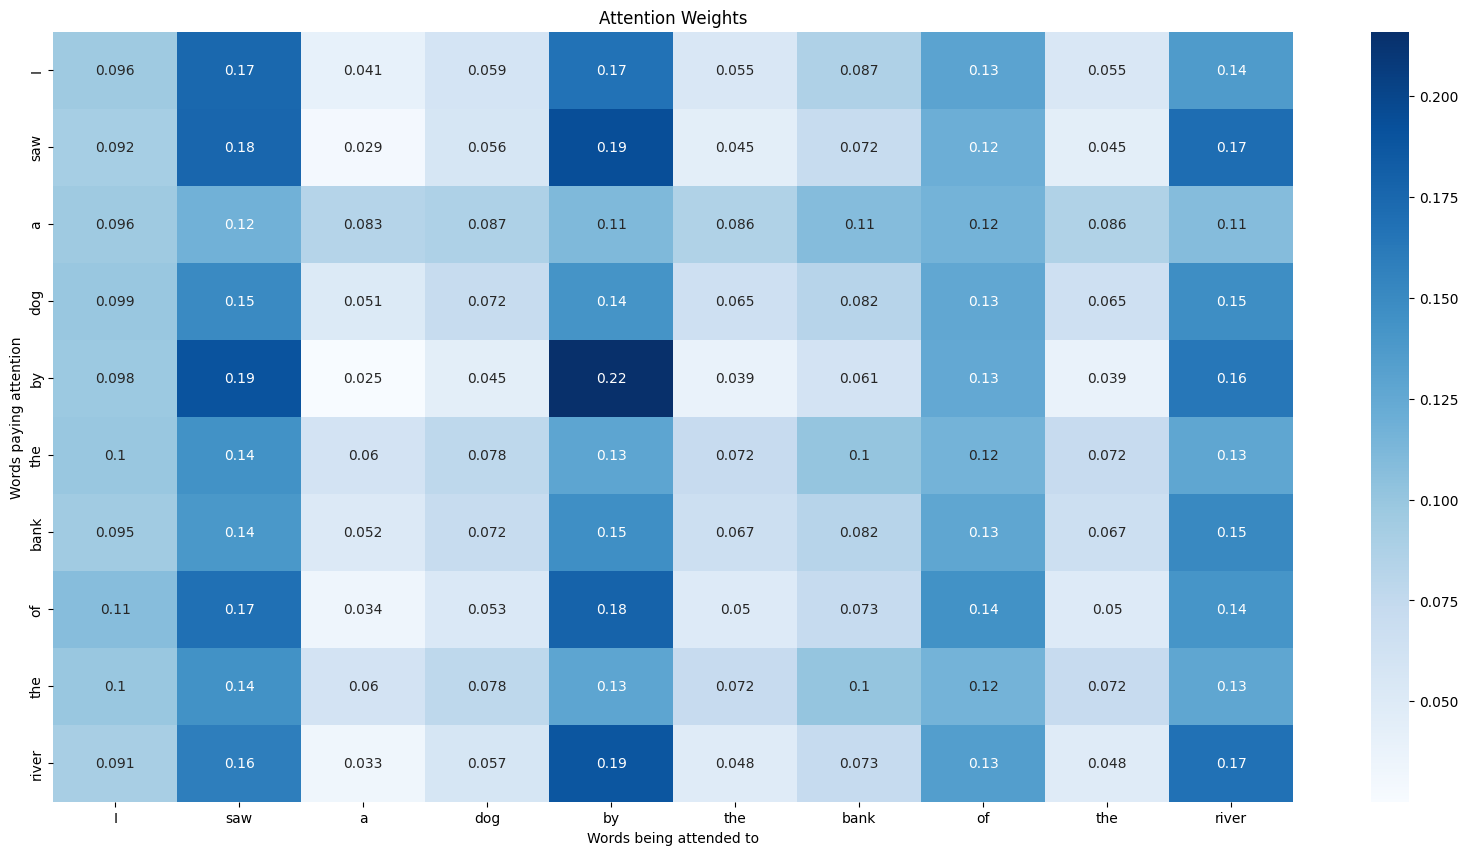

In [11]:
# Display the attention weights for better understanding
plt.figure(figsize=(20,10))
sns.heatmap(attention_weights[0].detach().numpy(), xticklabels=words, yticklabels=words, cmap="Blues", annot=True)
plt.title("Attention Weights")
plt.xlabel("Words being attended to")
plt.ylabel("Words paying attention")
plt.show()